In [112]:
%matplotlib inline 

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd

In [113]:
df = pd.read_csv("../datasets/drinks.csv")

### Get some insight from the data

In [114]:
df.head(3)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF


In [115]:
### check for NaN values
df.isnull().sum()

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64

We have NaN values only in the string fields, which will  not be a problem for now. But lets see which contries does not have a continent assigned:

In [116]:
df.loc[df['continent'].isnull(), ['continent','country']]

,continent,country
5,NaN,Antigua & Barbuda
11,NaN,Bahamas
14,NaN,Barbados
17,NaN,Belize
32,NaN,Canada
41,NaN,Costa Rica
43,NaN,Cuba
50,NaN,Dominica
51,NaN,Dominican Republic
54,NaN,El Salvador


In [117]:
# number of countries per continent:
df.continent.value_counts()

AF    53
EU    45
AS    44
OC    16
SA    12
Name: continent, dtype: int64

In [118]:
# average number of wine servings per continent
df.groupby('continent').wine_servings.mean().round(2).sort_values(ascending=False)


continent
EU    142.22
SA     62.42
OC     35.62
AF     16.26
AS      9.07
Name: wine_servings, dtype: float64

### bar plot of number of countries in each continent

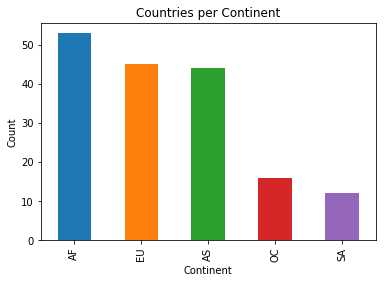

In [119]:
df.continent.value_counts().plot(kind='bar', title='Countries per Continent')
plt.xlabel('Continent')
plt.ylabel('Count')
plt.show()

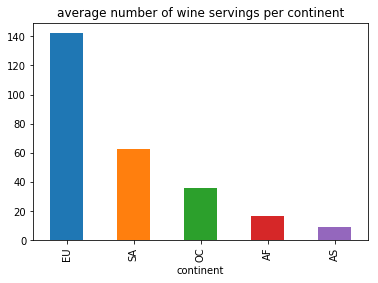

In [120]:
# bar plot average number of wine servings per continent
df.groupby('continent').wine_servings.mean().round(2).sort_values(ascending=False).plot(kind='bar', title='average number of wine servings per continent')

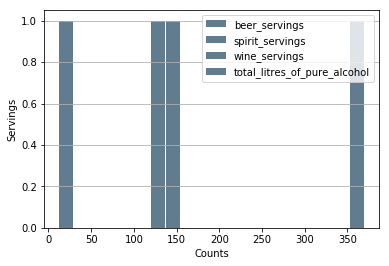

In [121]:
# histogram of wine servings in france
fr_s = df[df['country'] == 'France']
fr_s.plot.hist(bins=20, rwidth=0.9,color='#607c8e')
plt.xlabel('Counts')
plt.ylabel('Servings')
plt.grid(axis='y')


Text(0.5, 1.0, 'My Very Own Histogram')

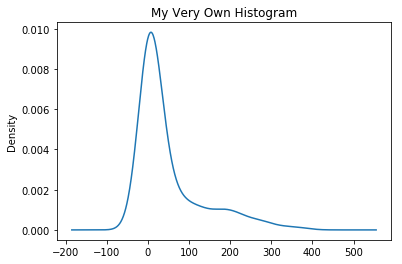

In [122]:
# density plot of wine servings
df.wine_servings.plot(kind='density')
plt.title('My Very Own Histogram')

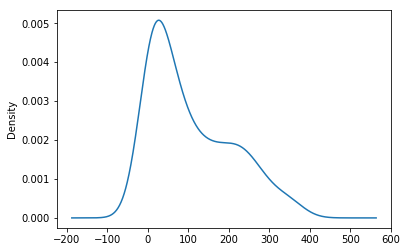

In [123]:
df.beer_servings.plot(kind='density')

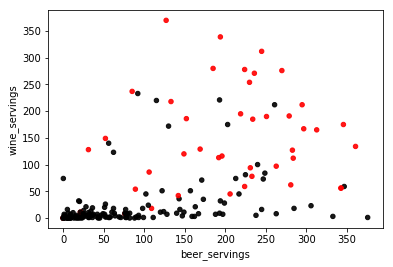

In [143]:
# scatterplot of beer servings versus wine servings (colored EU vs USA)
colors_eu = np.where(df.continent=='EU', 'red', 'black')
colors_usa = np.where(df.country=="USA", 'lightgreen', 'black')
df.plot(x='beer_servings', y='wine_servings', kind='scatter', alpha=0.9, color=colors_eu)

